In [1]:
def ifs_to_latlon(ds):
    '''
    Uses the latitude-longitude information encoded in the regular grid IFS output to reconstructed the regular grid
    '''
    return ds.rename({'value':'latlon'}).set_index(latlon=("lat","lon")).unstack("latlon")

In [2]:
import xarray as xr
import pandas as pd

# all Ocean variable names below
#avg_mlotst125  avg_siconc  avg_sisnthick  avg_sithick  avg_siue  avg_sivn  avg_sos  avg_tos  avg_zos

# Define the ocean variable name as a parameter
#ocean_var = 'avg_zos'  # Example: avg_sos, you can change this to any other variable like 'avg_mlotst125'

# Construct the file path (here for Historical run) dynamically using the ocean_var parameter
#file_path = f'/work/bm1344/wp6/d6.1/model-output/ifs-fesom2-sr/Phase1_FESOM/Hist/monthly/2d/{ocean_var}/{ocean_var}_*_monthly_mean.nc'

# Open the multiple netcdf files using the dynamic file path
#ds = xr.open_mfdataset(file_path)

# Inspect the updated dataset
#ds

import intake

# Load the catalog
catalog = intake.open_catalog('/work/bm1344/a270228/tco1279-ng5-eerie-production-hist-years-final.yaml')
print(list(catalog))

['2D_monthly_native_atmos_avg', '2D_monthly_native_atmos_min', '2D_monthly_native_atmos_max', '3D_monthly_native_soil_avg', '3D_monthly_native_atmos_avg', '2D_daily_native_atmos_avg', '2D_daily_native_atmos_min', '2D_daily_native_atmos_max', '2D_6hourly_native_atmos_instant', '2D_6hourly_native_atmos_accumulated', '3D_daily_native_soil_avg', '3D_6hourly_native_soil', '3D_daily_native_atmos_avg', '3D_6hourly_native_atmos', '2D_daily_native_ocean_avg', '3D_daily_native_ocean_avg_elems', '3D_daily_native_ocean_avg_nodes', '3D_daily_0.25deg_atmos_avg', '3D_6hourly_0.25deg_atmos', '2D_daily_0.25deg_atmos_avg', '2D_daily_0.25deg_atmos_min', '2D_daily_0.25deg_atmos_max', '2D_6hourly_0.25deg_atmos_instant', '2D_6hourly_0.25deg_atmos_accumulated', '3D_daily_0.25deg_soil_avg', '3D_6hourly_0.25deg_soil', '2D_monthly_0.25deg_atmos_avg', '2D_monthly_0.25deg_atmos_min', '2D_monthly_0.25deg_atmos_max', '3D_monthly_0.25deg_soil_avg', '3D_monthly_0.25deg_atmos_avg', '2D_daily_0.25deg_ocean_avg', '3D_da

In [28]:
#data=catalog['2D_daily_0.25deg_ocean_avg'].to_dask()
data=catalog['3D_monthly_0.25deg_atmos_avg'].to_dask()

data

<xarray.Dataset>
Dimensions:  (value: 1038240, level: 19, time: 780)
Coordinates:
    lat      (value) float64 dask.array<chunksize=(1038240,), meta=np.ndarray>
  * level    (level) int64 1 5 10 20 30 50 70 ... 400 500 600 700 850 925 1000
    lon      (value) float64 dask.array<chunksize=(1038240,), meta=np.ndarray>
  * time     (time) datetime64[ns] 1950-01-15T12:00:00 ... 2014-12-15T12:00:00
Dimensions without coordinates: value
Data variables:
    mq       (time, level, value) float64 dask.array<chunksize=(1, 1, 1038240), meta=np.ndarray>
    mr       (time, level, value) float64 dask.array<chunksize=(1, 1, 1038240), meta=np.ndarray>
    mt       (time, level, value) float64 dask.array<chunksize=(1, 1, 1038240), meta=np.ndarray>
    mu       (time, level, value) float64 dask.array<chunksize=(1, 1, 1038240), meta=np.ndarray>
    mv       (time, level, value) float64 dask.array<chunksize=(1, 1, 1038240), meta=np.ndarray>
    mw       (time, level, value) float64 dask.array<chunksize=(1, 1, 1038240), meta=np.ndarray>
    mz       (time, level, value) float64 dask.array<chunksize=(1, 1, 1038240), meta=np.ndarray>
Attributes:
    edition:            2
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          0
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

In [7]:
ssh= data['avg_zos']
sssm= ifs_to_latlon(ssh)
sssm

<xarray.DataArray 'avg_zos' (time: 7305, lat: 721, lon: 1440)>
dask.array<reshape, shape=(7305, 721, 1440), dtype=float64, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * time     (time) datetime64[ns] 1950-01-01 1950-01-02 ... 1969-12-31
Attributes: (12/30)
    paramId:                             263124
    dataType:                            fc
    numberOfPoints:                      1038240
    typeOfLevel:                         oceanSurface
    stepUnits:                           1
    stepType:                            avg
    ...                                  ...
    latitudeOfFirstGridPointInDegrees:   -90.0
    longitudeOfFirstGridPointInDegrees:  0.0
    iDirectionIncrementInDegrees:        0.25
    jDirectionIncrementInDegrees:        0.25
    iScansNegatively:                    0
    jScansPositively:                    1

In [8]:
sshm_std= sssm[:,:,:].std(dim='time')
sshm_std

<xarray.DataArray 'avg_zos' (lat: 721, lon: 1440)>
dask.array<_sqrt, shape=(721, 1440), dtype=float64, chunksize=(721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * lon      (lon) float64 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8

In [7]:
ds_mpi = xr.open_dataset('/work/bm1344/wp6/d6.1/model-output/icon-esm-er/icon-esm-er_erc2002_control_gr025_ssh_P1D.nc')

ds_mpi

<xarray.Dataset>
Dimensions:  (time: 7305, lon: 1440, lat: 721)
Coordinates:
  * time     (time) datetime64[ns] 1991-01-02 1991-01-03 ... 2011-01-01
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
Data variables:
    ssh      (time, lat, lon) float32 ...
Attributes:
    CDI:                       Climate Data Interface version 2.2.4 (https://...
    Conventions:               CF-1.6
    source:                    git@gitlab.dkrz.de:icon/icon-mpim.git@1ede179e...
    institution:               Max Planck Institute for Meteorology/Deutscher...
    title:                     ICON simulation
    history:                   Mon Oct 14 14:40:20 2024: cdo -P 12 -mergetime...
    references:                see MPIM/DWD publications
    comment:                   Sapphire Dyamond (k203123) on l40695 (Linux 4....
    cdo_openmp_thread_number:  12
    CDO:                       Climate Data Operators version 2.2.2 (https://...

In [8]:
#lonflip
ssh_mpi= ds_mpi['ssh']
ds_mpi.coords['lon'] = (ds_mpi.coords['lon'] + 180) % 360 - 180
ds_mpi = ds_mpi.sortby(ds_mpi.lon)
ssh_mpi

<xarray.DataArray 'ssh' (time: 7305, lat: 721, lon: 1440)>
[7584343200 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1991-01-02 1991-01-03 ... 2011-01-01
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
Attributes:
    standard_name:  ssh
    long_name:      surface elevation at cell center
    units:          m
    param:          1.3.10

In [9]:
ssh_mpi_std=ssh_mpi[:,:,:].std(dim='time')
ssh_mpi_std

<xarray.DataArray 'ssh' (lat: 721, lon: 1440)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.14868763, 0.14868315, 0.14867896, ..., 0.1487022 , 0.14869711,
        0.14869235],
       [0.14929011, 0.14928822, 0.14928603, ..., 0.14929593, 0.14929399,
        0.14929202],
       [0.14932196, 0.14932057, 0.14931917, ..., 0.14932616, 0.14932479,
        0.14932323]], dtype=float32)
Coordinates:
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0

/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/tmp/ipykernel_3559761/2068201259.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust rect to make room for colorbar


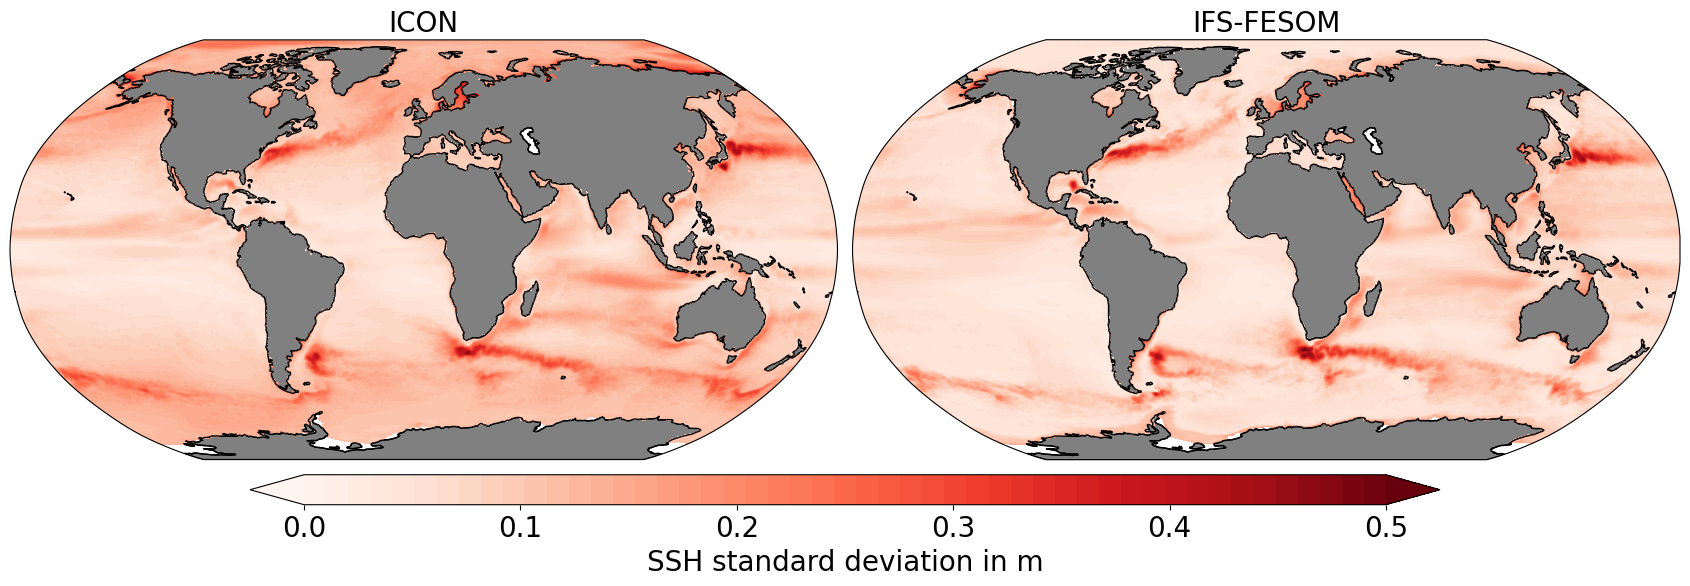

In [10]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo

# Create the figure
fig = plt.figure(figsize=(17, 15))

# First subplot
ax1 = fig.add_subplot(121, projection=ccrs.Robinson())
p1 = ssh_mpi_std[:, :].plot.contourf(ax=ax1, vmin=0, vmax=0.5, levels=50, extend='both', cmap='Reds', add_colorbar=False, transform=ccrs.PlateCarree(), robust=True)
ax1.coastlines()
ax1.add_feature(cfeature.LAND, facecolor='gray', edgecolor='k')
ax1.set_title('ICON', fontsize=20)

# Second subplot
ax2 = fig.add_subplot(122, projection=ccrs.Robinson())
p2 = sshm_std[:,:].plot.contourf(ax=ax2, vmin=0, vmax=0.5, levels=50, extend='both', cmap='Reds', add_colorbar=False, transform=ccrs.PlateCarree(), robust=True)
ax2.coastlines()
ax2.add_feature(cfeature.LAND, facecolor='gray', edgecolor='k')
ax2.set_title('IFS-FESOM', fontsize=20)

# Add a common colorbar
cbar_ax = fig.add_axes([0.15, 0.38, 0.7, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(p1, cax=cbar_ax, extend='both', orientation='horizontal', ticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5])
cbar.set_label('SSH standard deviation in m', fontsize=20)
cbar.ax.tick_params(labelsize=20)  # Adjust colorbar tick label font size

# Adjust layout
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust rect to make room for colorbar
plt.savefig("ICON_FESOM_EERIE_SSH_stddev.png", bbox_inches='tight', dpi=400)
plt.show()

In [11]:
import intake

eerie_cat=intake.open_catalog("https://raw.githubusercontent.com/eerie-project/intake_catalogues/main/eerie.yaml")
eerie_cat

eerie:
  args:
    path: https://raw.githubusercontent.com/eerie-project/intake_catalogues/main/eerie.yaml
  description: ''
  driver: intake.catalog.local.YAMLFileCatalog
  metadata: {}


In [12]:
obs=eerie_cat['dkrz.disk.observations']['AVISO']['ssh-L4']['daily'].to_dask()
#print((obs))
obs

<xarray.Dataset>
Dimensions:         (time: 10766, latitude: 720, longitude: 1440, nv: 2)
Coordinates:
  * latitude        (latitude) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * longitude       (longitude) float32 -179.9 -179.6 -179.4 ... 179.6 179.9
  * nv              (nv) int32 0 1
  * time            (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2022-06-23
Data variables: (12/14)
    adt             (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    crs             (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    err_sla         (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    err_ugosa       (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    err_vgosa       (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    flag_ice        (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ...              ...
    sla             (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    tpa_correction  (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    ugos            (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ugosa           (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    vgos            (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    vgosa           (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         http://climate.copernicus.eu/c3s-user-se...
    creator_email:                   http://climate.copernicus.eu/c3s-user-se...
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               1993-01-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             1992-12-31T12:00:00Z
    title:                           DT merged two satellites Global Ocean Gr...

In [14]:
ssho=obs['adt'][:,:,:].sel(time=slice('1993-01-01', '2021-12-31'))
#ssh[0,:,:].plot()
ssho

<xarray.DataArray 'adt' (time: 10592, latitude: 720, longitude: 1440)>
dask.array<getitem, shape=(10592, 720, 1440), dtype=float64, chunksize=(1, 720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * time       (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2021-12-31
Attributes:
    comment:        The absolute dynamic topography is the sea surface height...
    grid_mapping:   crs
    long_name:      Absolute dynamic topography
    standard_name:  sea_surface_height_above_geoid
    units:          m

In [15]:
import numpy as np

ssho_std= ssho.std(dim='time')
ssho_std

<xarray.DataArray 'adt' (latitude: 720, longitude: 1440)>
dask.array<_sqrt, shape=(720, 1440), dtype=float64, chunksize=(720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9

/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/tmp/ipykernel_1103964/2203272678.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust rect to make room for colorbar


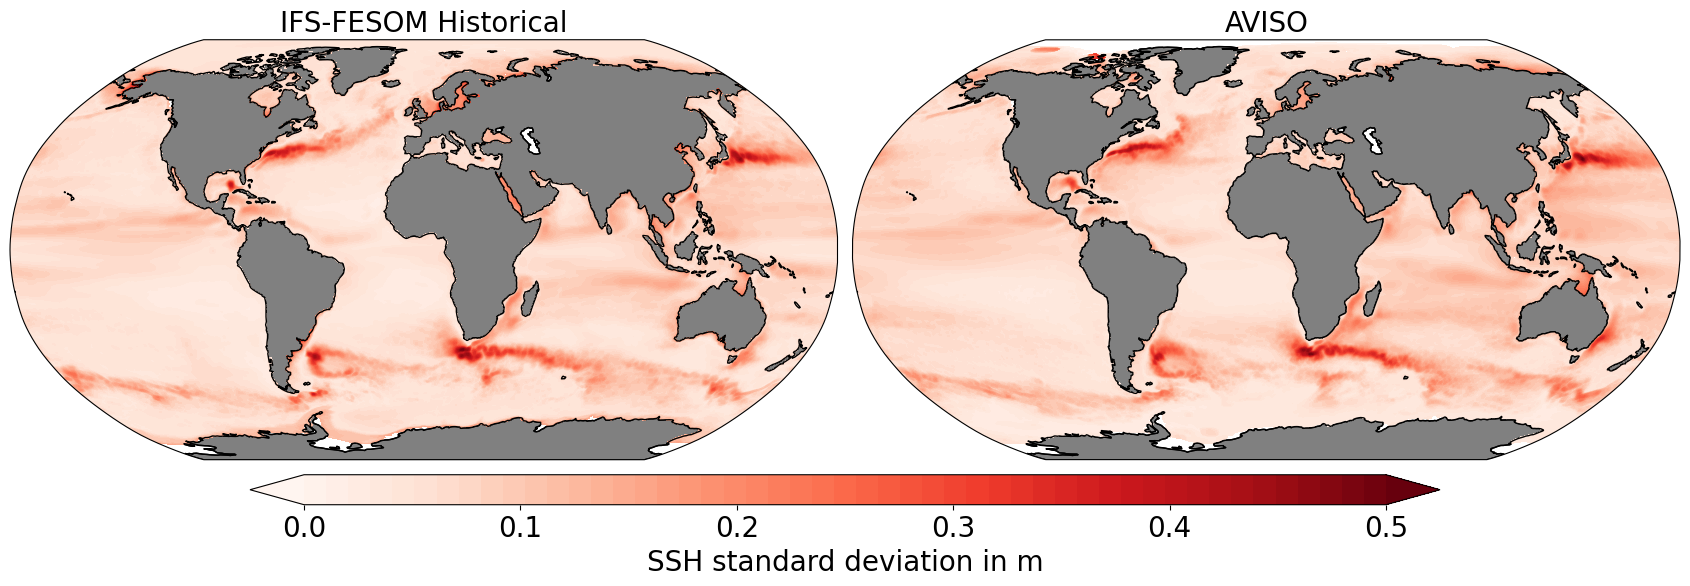

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo

# Create the figure
fig = plt.figure(figsize=(17, 15))

# First subplot
ax1 = fig.add_subplot(121, projection=ccrs.Robinson())
p1 = sshm_std[:, :].plot.contourf(ax=ax1, vmin=0, vmax=0.5, levels=50, extend='both', cmap='Reds', add_colorbar=False, transform=ccrs.PlateCarree(), robust=True)
ax1.coastlines()
ax1.add_feature(cfeature.LAND, facecolor='gray', edgecolor='k')
ax1.set_title('IFS-FESOM Historical', fontsize=20)

# Second subplot
ax2 = fig.add_subplot(122, projection=ccrs.Robinson())
p2 = ssho_std[:,:].plot.contourf(ax=ax2, vmin=0, vmax=0.5, levels=50, extend='both', cmap='Reds', add_colorbar=False, transform=ccrs.PlateCarree(), robust=True)
ax2.coastlines()
ax2.add_feature(cfeature.LAND, facecolor='gray', edgecolor='k')
ax2.set_title('AVISO', fontsize=20)

# Add a common colorbar
cbar_ax = fig.add_axes([0.15, 0.38, 0.7, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(p1, cax=cbar_ax, extend='both', orientation='horizontal', ticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5])
cbar.set_label('SSH standard deviation in m', fontsize=20)
cbar.ax.tick_params(labelsize=20)  # Adjust colorbar tick label font size

# Adjust layout
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust rect to make room for colorbar
plt.savefig("AVISO_FESOM_EERIE_SSH_stddev.png", bbox_inches='tight', dpi=400)
plt.show()

/tmp/ipykernel_166610/1853014347.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust rect to make room for colorbar


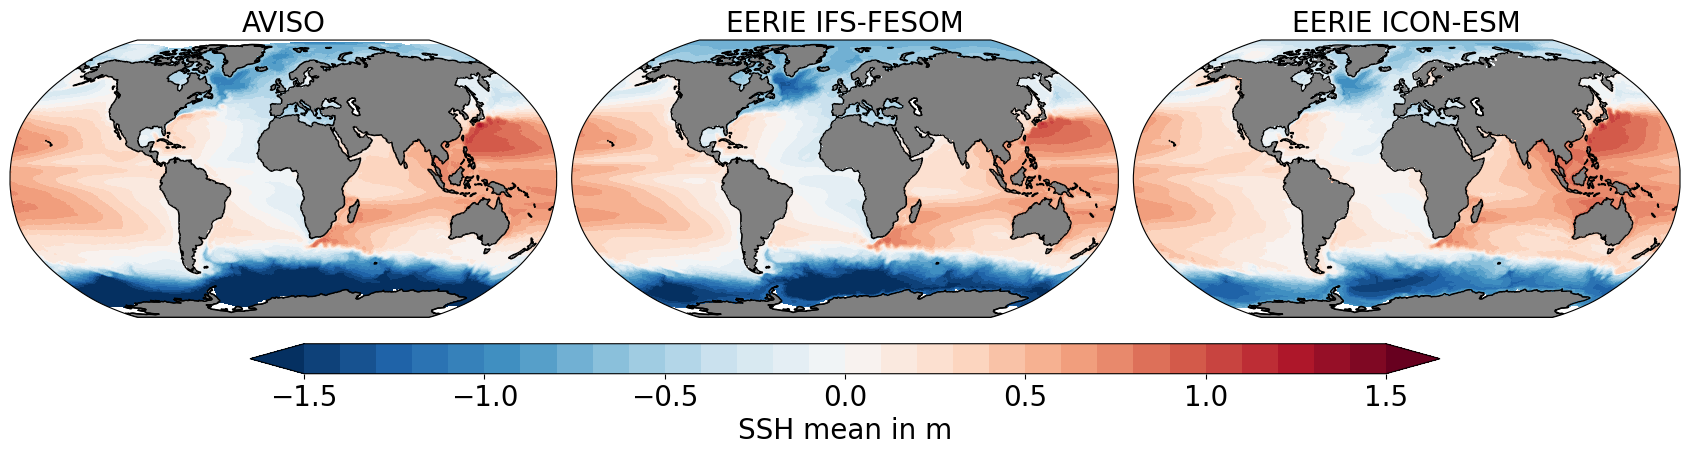

In [26]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo

# Create the figure
fig = plt.figure(figsize=(17, 15))

# First subplot
ax1 = fig.add_subplot(131, projection=ccrs.Robinson())
p1 = ssh_yr_mean_anomaly[:, :].plot.contourf(ax=ax1, vmin=-1.5, vcenter=0, vmax=1.5, levels=31, extend='both', cmap='RdBu_r', add_colorbar=False, transform=ccrs.PlateCarree(), robust=True)
ax1.coastlines()
ax1.add_feature(cfeature.LAND, facecolor='gray', edgecolor='k')
ax1.set_title('AVISO', fontsize=20)

# Second subplot
ax2 = fig.add_subplot(132, projection=ccrs.Robinson())
p2 = sssm_yr_mean[0,:,:].plot.contourf(ax=ax2, vmin=-1.5, vcenter=0, vmax=1.5, levels=31, extend='both', cmap='RdBu_r', add_colorbar=False, transform=ccrs.PlateCarree(), robust=True)
ax2.coastlines()
ax2.add_feature(cfeature.LAND, facecolor='gray', edgecolor='k')
ax2.set_title('EERIE IFS-FESOM', fontsize=20)

# Third subplot
ax3 = fig.add_subplot(133, projection=ccrs.Robinson())
p3 = ssh_mpi_yr_mean[:, :].plot.contourf(ax=ax3, vmin=-1.5, vcenter=0, vmax=1.5, levels=31, extend='both', cmap='RdBu_r', add_colorbar=False, transform=ccrs.PlateCarree(), robust=True)
ax3.coastlines()
ax3.add_feature(cfeature.LAND, facecolor='gray', edgecolor='k')
ax3.set_title('EERIE ICON-ESM', fontsize=20)

# Add a common colorbar
cbar_ax = fig.add_axes([0.15, 0.42, 0.7, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(p1, cax=cbar_ax, extend='both', orientation='horizontal', ticks=[-1.5, -1.0, -0.5, 0, 0.5, 1.0, 1.5])
cbar.set_label('SSH mean in m', fontsize=20)
cbar.ax.tick_params(labelsize=20)  # Adjust colorbar tick label font size

# Adjust layout
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust rect to make room for colorbar
plt.savefig("FESOm_ICON_SSH_mean.png",bbox_inches='tight', dpi=400)
plt.show()

/tmp/ipykernel_1199156/2765101806.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust rect to make room for colorbar


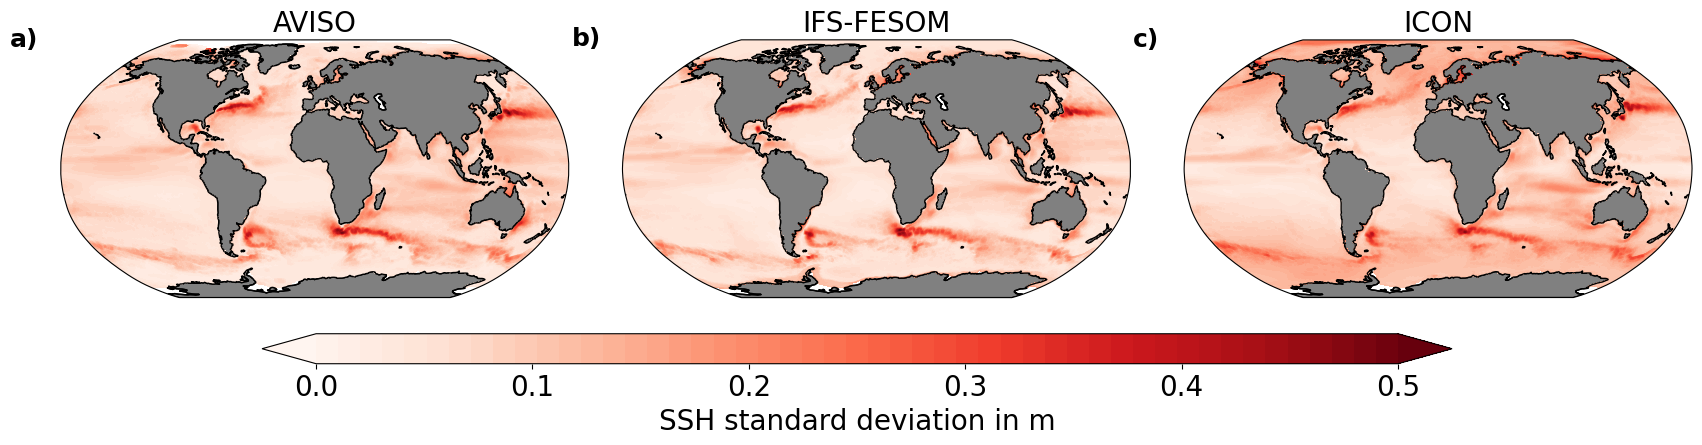

In [17]:
# Create the figure
fig = plt.figure(figsize=(17, 15))

# First subplot
ax1 = fig.add_subplot(131, projection=ccrs.Robinson())
p1 = ssho_std[:, :].plot.contourf(ax=ax1, vmin=0, vmax=0.5, levels=50, extend='both', cmap='Reds', add_colorbar=False, transform=ccrs.PlateCarree(), robust=True)
ax1.coastlines()
ax1.add_feature(cfeature.LAND, facecolor='gray', edgecolor='k')
ax1.set_title('AVISO', fontsize=20)
# Add subplot label
ax1.text(-0.1, 1.05, 'a)', transform=ax1.transAxes, fontsize=18, fontweight='bold', va='top', ha='left')

# Second subplot
ax2 = fig.add_subplot(132, projection=ccrs.Robinson())
p2 = sshm_std[:, :].plot.contourf(ax=ax2, vmin=0, vmax=0.5, levels=50, extend='both', cmap='Reds', add_colorbar=False, transform=ccrs.PlateCarree(), robust=True)
ax2.coastlines()
ax2.add_feature(cfeature.LAND, facecolor='gray', edgecolor='k')
ax2.set_title('IFS-FESOM', fontsize=20)
# Add subplot label
ax2.text(-0.1, 1.05, 'b)', transform=ax2.transAxes, fontsize=18, fontweight='bold', va='top', ha='left')

# Third subplot
ax3 = fig.add_subplot(133, projection=ccrs.Robinson())
p3 = ssh_mpi_std[:, :].plot.contourf(ax=ax3, vmin=0, vmax=0.5, levels=50, extend='both', cmap='Reds', add_colorbar=False, transform=ccrs.PlateCarree(), robust=True)
ax3.coastlines()
ax3.add_feature(cfeature.LAND, facecolor='gray', edgecolor='k')
ax3.set_title('ICON', fontsize=20)
# Add subplot label
ax3.text(-0.1, 1.05, 'c)', transform=ax3.transAxes, fontsize=18, fontweight='bold', va='top', ha='left')

# Add a common colorbar
cbar_ax = fig.add_axes([0.15, 0.42, 0.7, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(p1, cax=cbar_ax, extend='both', orientation='horizontal', ticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5])
cbar.set_label('SSH standard deviation in m', fontsize=20)
cbar.ax.tick_params(labelsize=20)  # Adjust colorbar tick label font size

# Adjust layout
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust rect to make room for colorbar
plt.savefig("AVISO_ICON_FESOM_EERIE_SSH_stddev.png", bbox_inches='tight', dpi=400)
plt.show()
